# DATOS DEL MINIPROYECTO

### MATRIZ DE CORRELACION

C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_12936\3202409363.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr(method='pearson')


Matriz de correlación de Pearson:
             WIND       IND      RAIN     IND.1     T.MAX     IND.2     T.MIN  \
WIND     1.000000 -0.038578  0.120876  0.070512 -0.242559  0.047860 -0.093014   
IND     -0.038578  1.000000 -0.148535 -0.028176 -0.075365 -0.015173 -0.050447   
RAIN     0.120876 -0.148535  1.000000  0.023944 -0.044248  0.012567  0.011067   
IND.1    0.070512 -0.028176  0.023944  1.000000 -0.036045  0.909739 -0.033344   
T.MAX   -0.242559 -0.075365 -0.044248 -0.036045  1.000000 -0.247060  0.789980   
IND.2    0.047860 -0.015173  0.012567  0.909739 -0.247060  1.000000 -0.535746   
T.MIN   -0.093014 -0.050447  0.011067 -0.033344  0.789980 -0.535746  1.000000   
T.MIN.G  0.012823 -0.064185  0.027365 -0.004040  0.679804 -0.129421  0.906869   

          T.MIN.G  
WIND     0.012823  
IND     -0.064185  
RAIN     0.027365  
IND.1   -0.004040  
T.MAX    0.679804  
IND.2   -0.129421  
T.MIN    0.906869  
T.MIN.G  1.000000  


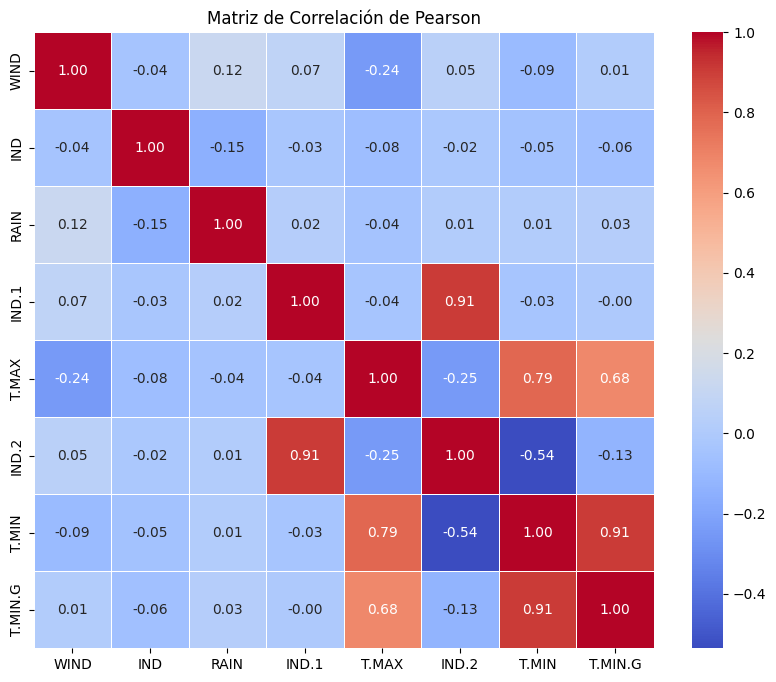

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Calcular la matriz de correlación de Pearson
matriz_correlacion = df.corr(method='pearson')

# Mostrar la matriz de correlación
print("Matriz de correlación de Pearson:")
print(matriz_correlacion)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()

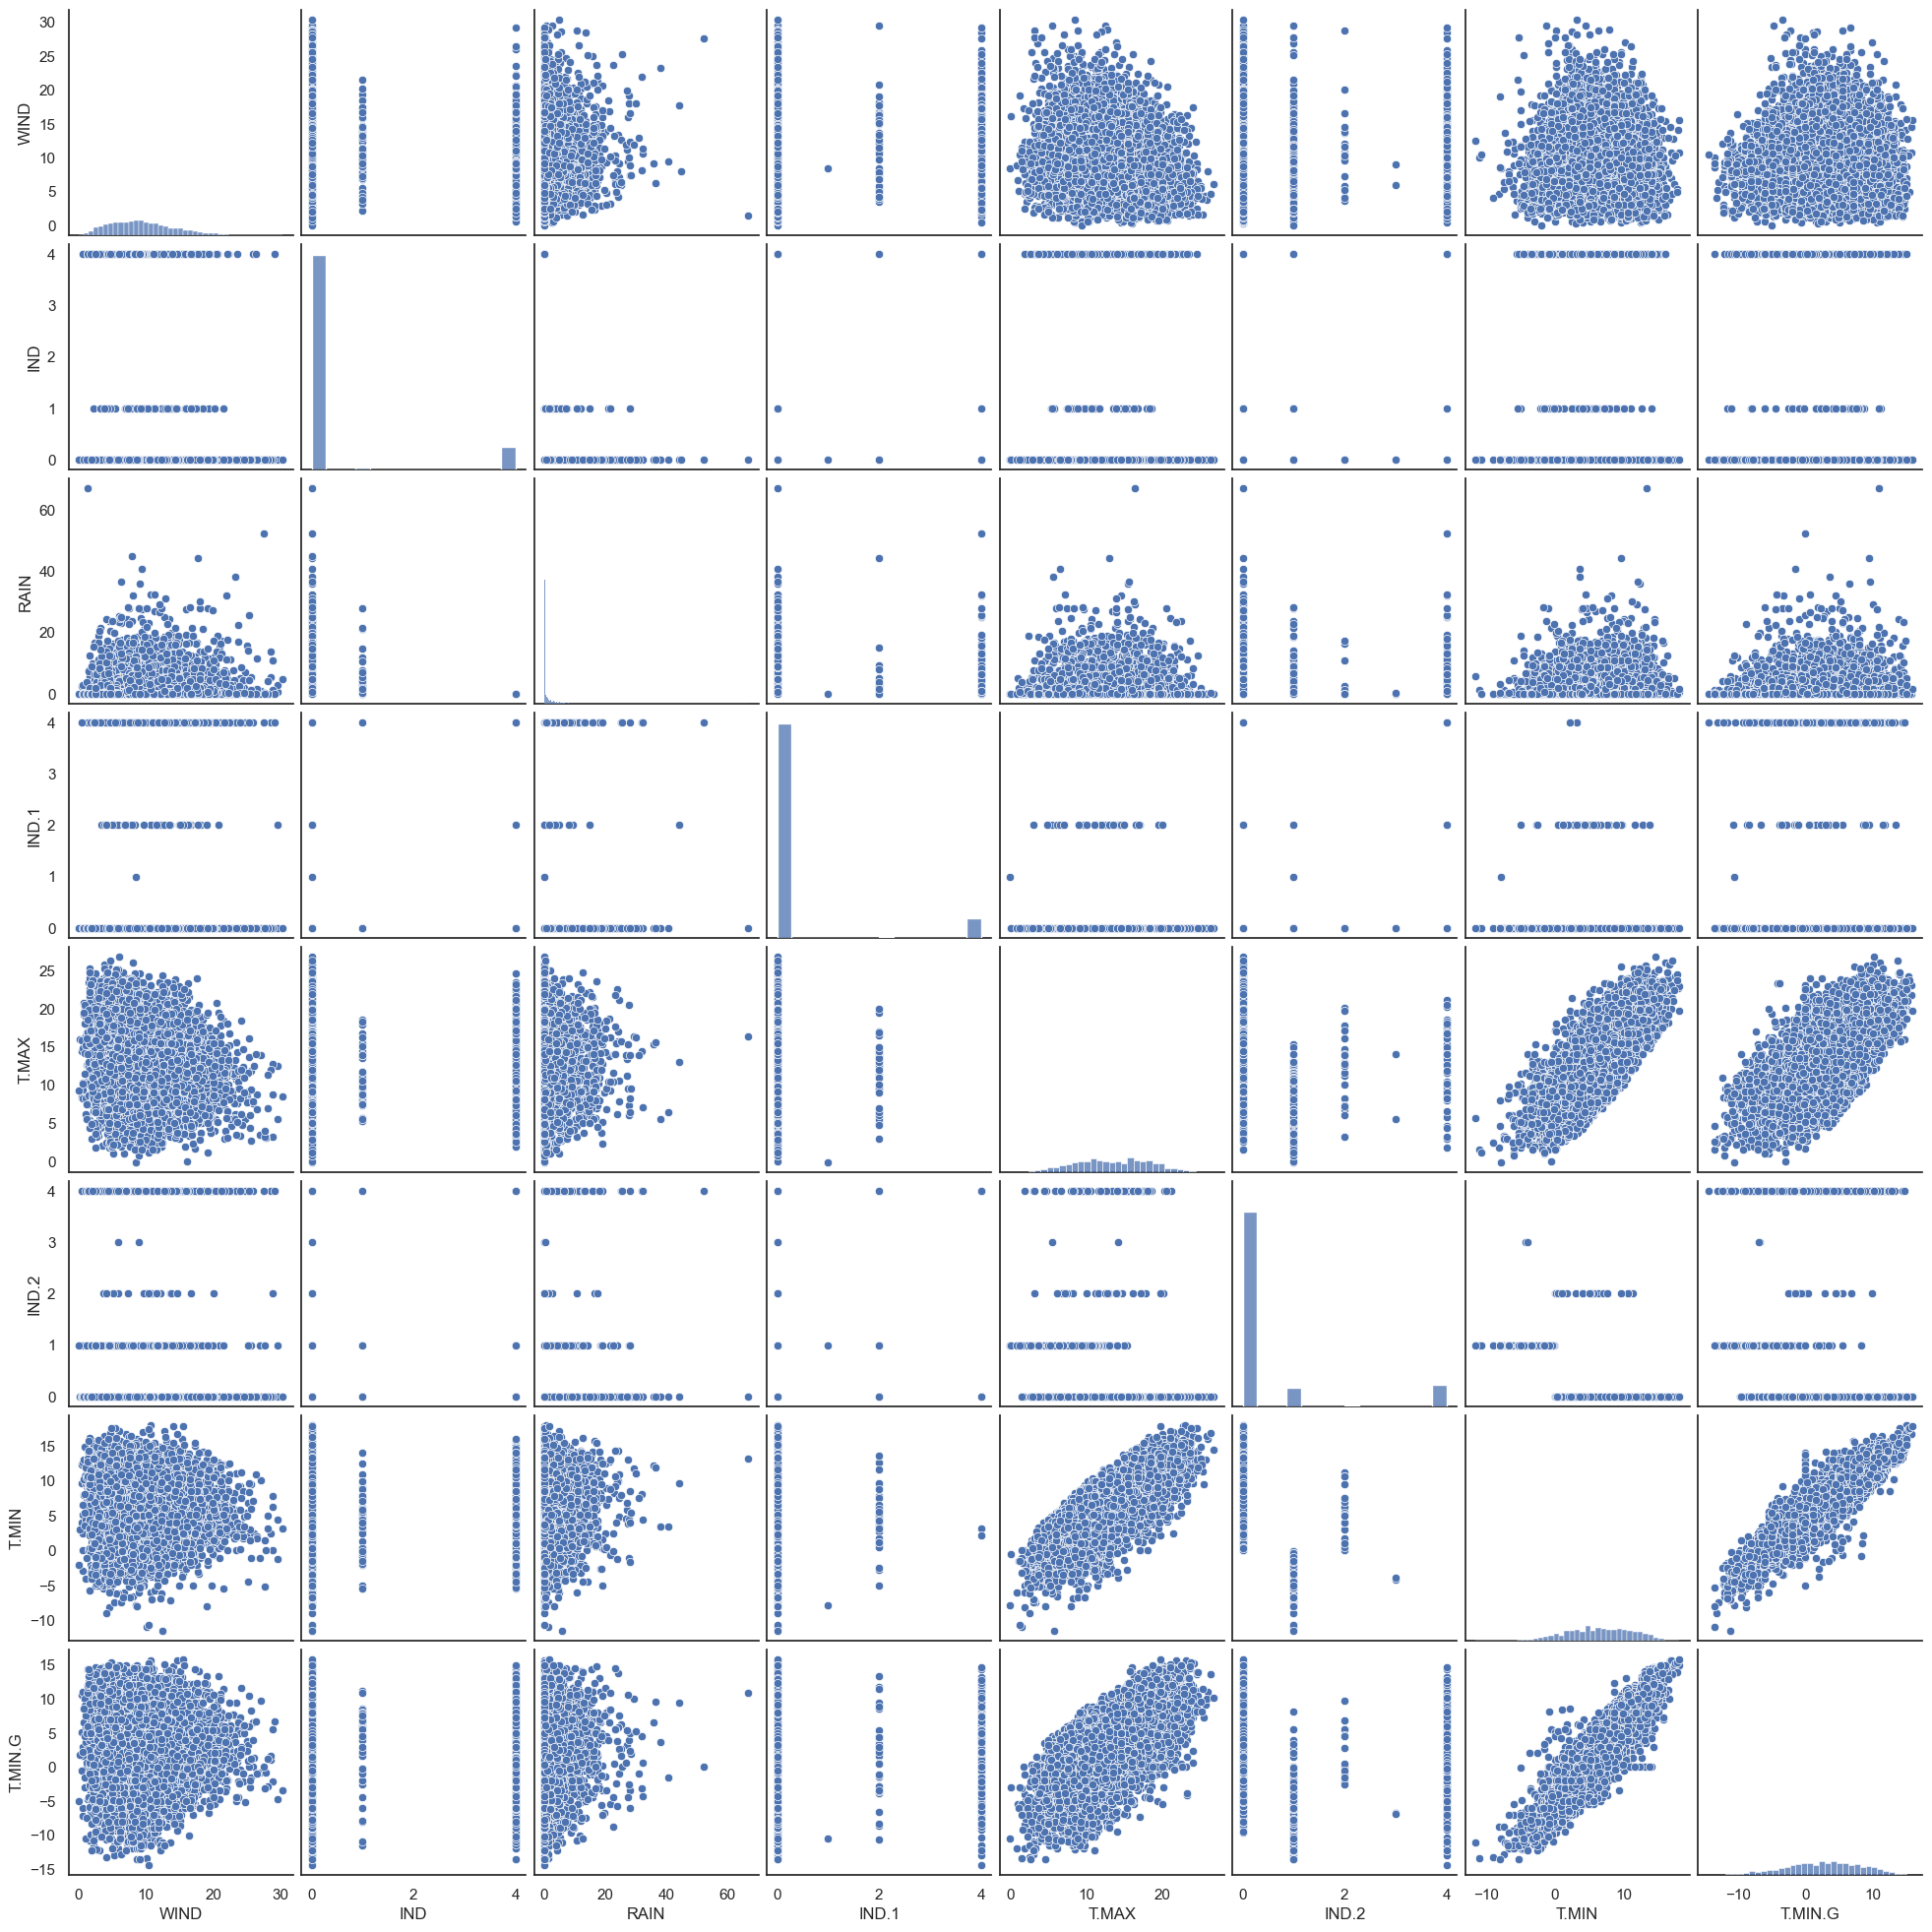

In [15]:
sns.pairplot(df)

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MAX", "T.MIN", "T.MIN.G", "WIND"]
data = df[columnas_interes].dropna()  # Eliminar valores NaN

# Calcular Skewness (Asimetría de Fisher)
skewness_values = data.apply(skew, nan_policy='omit')

# Calcular el índice de Yule-Kendall
def yule_kendall(series):
    Q1 = series.quantile(0.25)
    Q2 = series.median()
    Q3 = series.quantile(0.75)
    return (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)

yk_values = data.apply(yule_kendall)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Skewness": skewness_values,
    "Yule-Kendall Index": yk_values
})

# Mostrar resultados
print(resultados)

# # Visualización de la distribución de cada variable
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# sns.set(style="white")

# for i, col in enumerate(columnas_interes):
#     ax = axes[i // 2, i % 2]
#     sns.histplot(data[col], bins=30, kde=True, ax=ax, color="steelblue", alpha=0.6)
#     ax.set_title(f'Distribución de {col}')
#     ax.axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
#     ax.axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')
#     ax.legend()

# plt.tight_layout()
# plt.show()


         Skewness  Yule-Kendall Index
T.MAX   -0.007185            0.078947
T.MIN   -0.190316            0.014493
T.MIN.G -0.192213            0.000000
WIND     0.639317            0.083815


### VARIABLES APAREADAS T MIN G - T MIN 

Correlación de Pearson entre T.MIN y T.MIN.G: 0.91


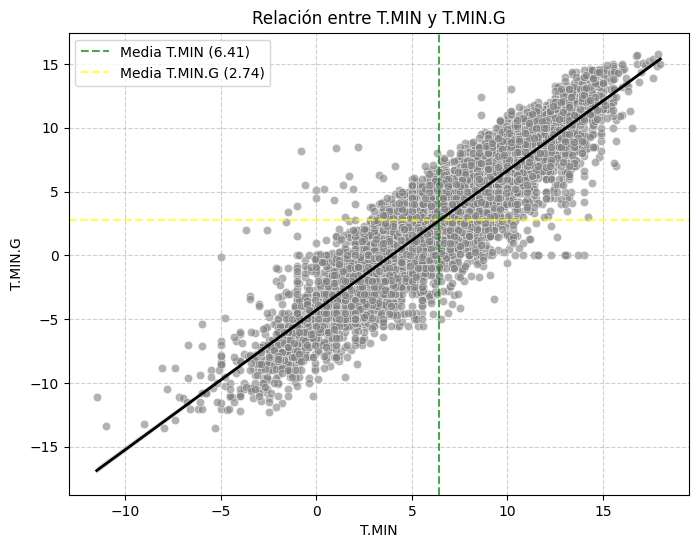

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MIN.G"]
data = df[columnas_interes]

# Calcular la correlación de Pearson entre T.MIN y T.MIN.G
correlacion = data.corr(method='pearson').iloc[0, 1]
print(f"Correlación de Pearson entre T.MIN y T.MIN.G: {correlacion:.2f}")

# Calcular las medias de T.MIN y T.MIN.G
media_tmin = data["T.MIN"].mean()
media_tmin_g = data["T.MIN.G"].mean()

# Configurar el gráfico
plt.figure(figsize=(8, 6))

# Dibujar scatter plot en gris claro
sns.scatterplot(x="T.MIN", y="T.MIN.G", data=data, color='gray', alpha=0.6)

# Dibujar líneas punteadas indicando los valores medios
plt.axvline(x=media_tmin, color='green', linestyle='--', alpha=0.7, label=f'Media T.MIN ({media_tmin:.2f})')
plt.axhline(y=media_tmin_g, color='yellow', linestyle='--', alpha=0.7, label=f'Media T.MIN.G ({media_tmin_g:.2f})')

# Dibujar línea de tendencia
sns.regplot(x="T.MIN", y="T.MIN.G", data=data, scatter=False, color='black', line_kws={'linestyle': '-', 'linewidth': 2})

# Etiquetas y título
plt.title('Relación entre T.MIN y T.MIN.G')
plt.xlabel('T.MIN')
plt.ylabel('T.MIN.G')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()




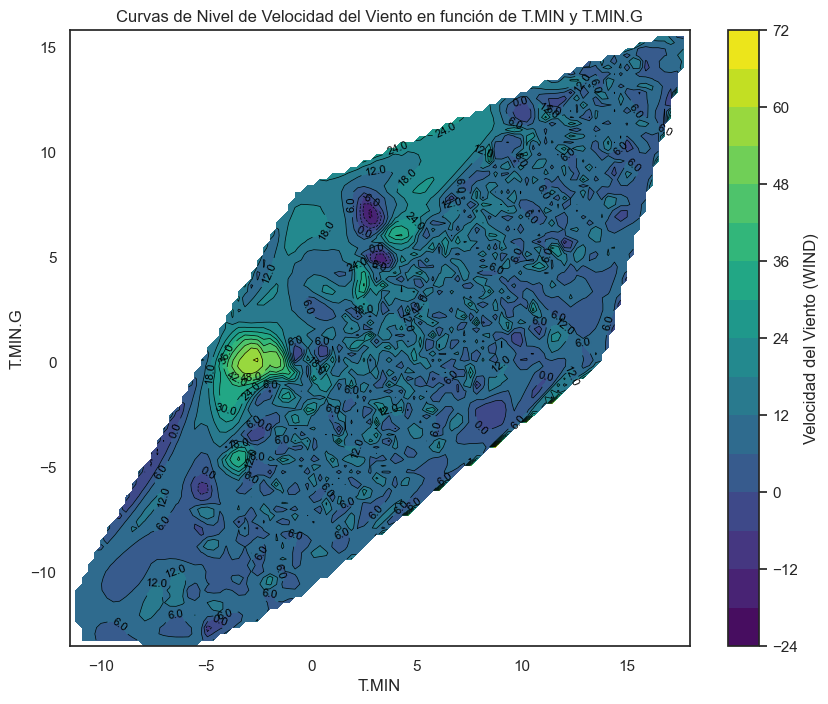

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés y eliminar valores NaN
columnas_interes = ["T.MIN", "T.MIN.G", "WIND"]
data = df[columnas_interes].dropna()

# Extraer las variables
x = data["T.MIN"]
y = data["T.MIN.G"]
z = data["WIND"]

# Crear una malla para las curvas de nivel
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# Interpolar valores de WIND en la malla
Z = griddata((x, y), z, (X, Y), method='cubic')

# Crear la figura
plt.figure(figsize=(10, 8))

# Dibujar las curvas de nivel
contour = plt.contourf(X, Y, Z, levels=15, cmap="viridis")
plt.colorbar(contour, label="Velocidad del Viento (WIND)")

# Añadir líneas de contorno con etiquetas
contour_lines = plt.contour(X, Y, Z, levels=15, colors='black', linewidths=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

# Configuración del gráfico
plt.title("Curvas de Nivel de Velocidad del Viento en función de T.MIN y T.MIN.G")
plt.xlabel("T.MIN")
plt.ylabel("T.MIN.G")

# Mostrar el gráfico
plt.show()




### VARIABLES APAREADA T.MIN Y T.MAX

Correlación de Pearson entre T.MIN y T.MAX: 0.79
Ecuación de la recta: y = 0.83x + 8.01


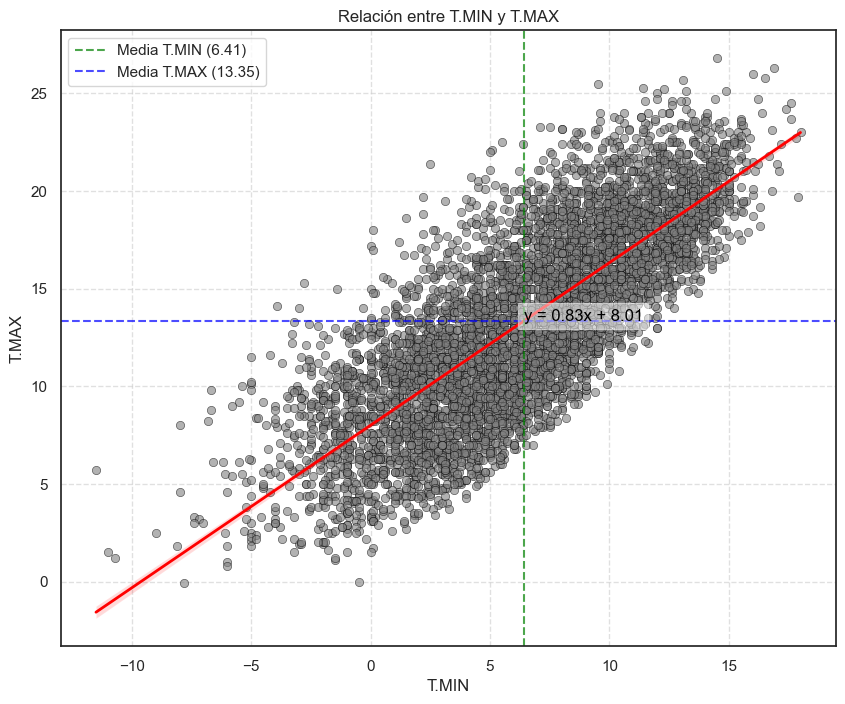

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MAX"]
data = df[columnas_interes]

# Eliminar valores NaN o infinitos para evitar errores en la regresión
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Calcular la correlación de Pearson
correlacion = data.corr(method='pearson').iloc[0, 1]
print(f"Correlación de Pearson entre T.MIN y T.MAX: {correlacion:.2f}")

# Calcular las medias de T.MIN y T.MAX
media_tmin = data["T.MIN"].mean()
media_tmax = data["T.MAX"].mean()

# Calcular la ecuación de la línea de tendencia (regresión lineal)
coeficientes = np.polyfit(data["T.MIN"], data["T.MAX"], 1)  # Ajuste lineal
pendiente, intercepto = coeficientes
print(f"Ecuación de la recta: y = {pendiente:.2f}x + {intercepto:.2f}")

# Crear el gráfico
plt.figure(figsize=(10, 8))

# Dibujar scatter plot en azul con bordes negros
sns.scatterplot(x="T.MIN", y="T.MAX", data=data, color='gray', edgecolor='black', alpha=0.6)

# Dibujar línea de tendencia en rojo
sns.regplot(x="T.MIN", y="T.MAX", data=data, scatter=False, color='red', line_kws={'linestyle': '-', 'linewidth': 2})

# Dibujar líneas punteadas indicando los valores medios
plt.axvline(x=media_tmin, color='green', linestyle='--', alpha=0.7, label=f'Media T.MIN ({media_tmin:.2f})')
plt.axhline(y=media_tmax, color='blue', linestyle='--', alpha=0.7, label=f'Media T.MAX ({media_tmax:.2f})')

# Etiquetas y título
plt.title('Relación entre T.MIN y T.MAX')
plt.xlabel('T.MIN')
plt.ylabel('T.MAX')

# Agregar ecuación en el gráfico
plt.text(media_tmin, media_tmax, f'y = {pendiente:.2f}x + {intercepto:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Agregar leyenda
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()


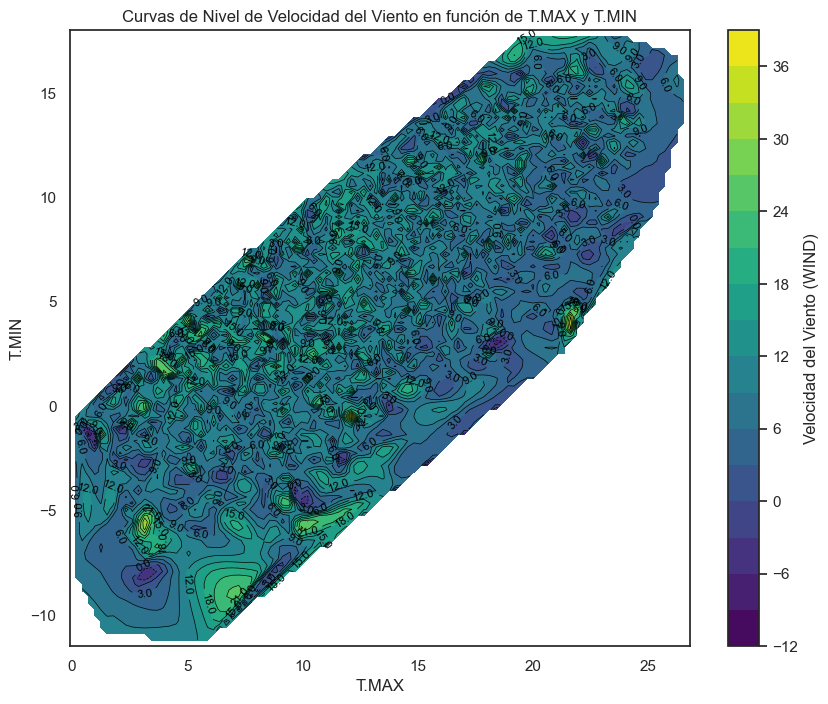

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés y eliminar valores NaN
columnas_interes = ["T.MAX", "T.MIN", "WIND"]
data = df[columnas_interes].dropna()

# Extraer las variables
x = data["T.MAX"]
y = data["T.MIN"]
z = data["WIND"]

# Crear una malla para las curvas de nivel
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))

# Interpolar valores de WIND en la malla
Z = griddata((x, y), z, (X, Y), method='cubic')

# Crear la figura
plt.figure(figsize=(10, 8))

# Dibujar las curvas de nivel con colores
contour = plt.contourf(X, Y, Z, levels=15, cmap="viridis")
plt.colorbar(contour, label="Velocidad del Viento (WIND)")

# Añadir líneas de contorno con etiquetas
contour_lines = plt.contour(X, Y, Z, levels=15, colors='black', linewidths=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

# Configuración del gráfico
plt.title("Curvas de Nivel de Velocidad del Viento en función de T.MAX y T.MIN")
plt.xlabel("T.MAX")
plt.ylabel("T.MIN")

# Mostrar el gráfico
plt.show()


### AUTOCORRELACIONES

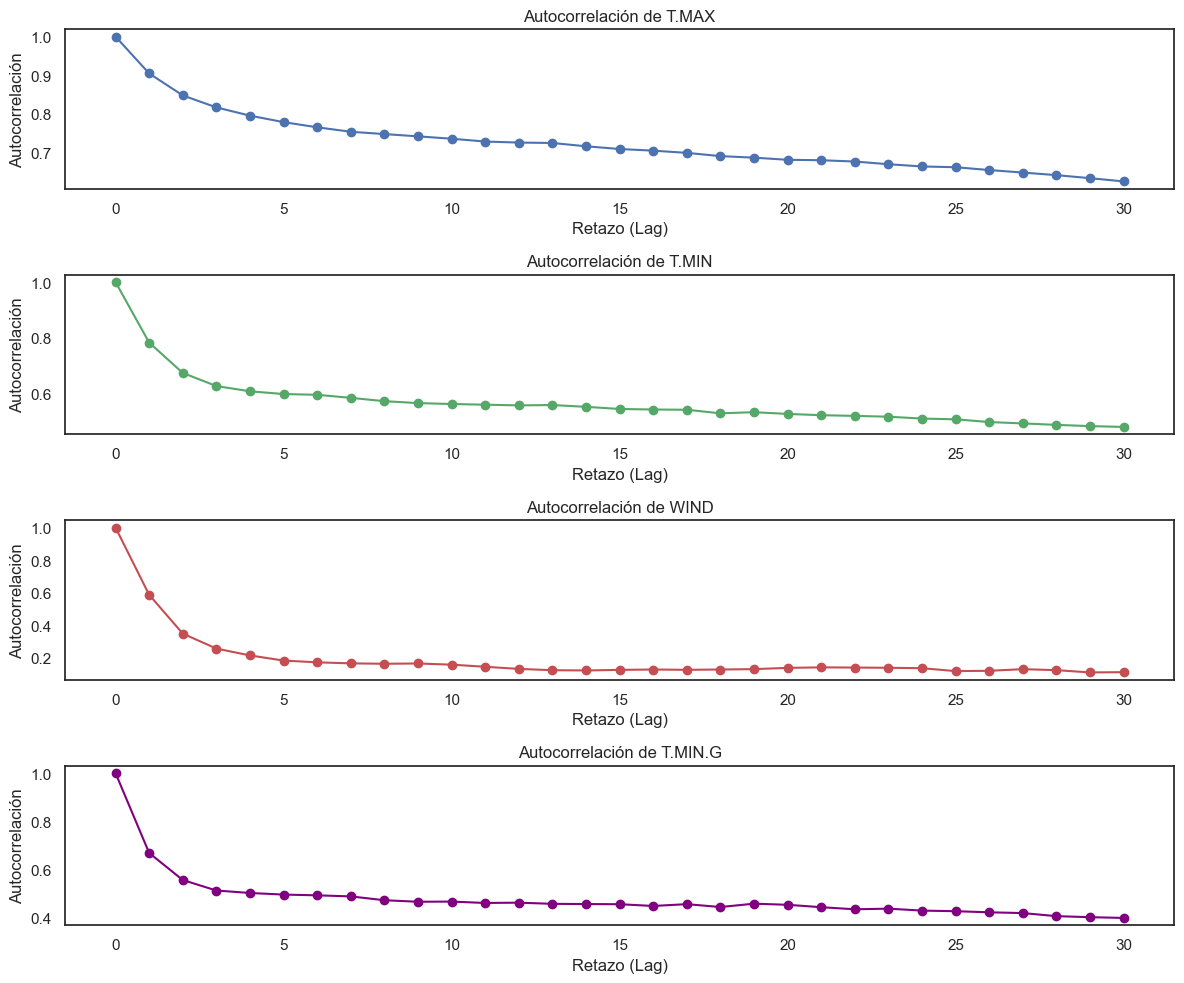

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés (incluyendo T.MIN.G)
columnas_interes = ["T.MAX", "T.MIN", "WIND", "T.MIN.G"]
data = df[columnas_interes]

# Función para calcular la autocorrelación
def autocorrelacion(series, lag_max):
    return [series.autocorr(lag) for lag in range(lag_max + 1)]

# Establecer el número máximo de lags
lag_max = 30  # Puedes ajustarlo según el intervalo temporal de tu dataset

# Calcular la autocorrelación para cada variable
autocorr_tmax = autocorrelacion(data["T.MAX"], lag_max)
autocorr_tmin = autocorrelacion(data["T.MIN"], lag_max)
autocorr_wind = autocorrelacion(data["WIND"], lag_max)
autocorr_tming = autocorrelacion(data["T.MIN.G"], lag_max)

# Crear un gráfico de autocorrelación para cada variable
plt.figure(figsize=(12, 10))

# Graficar la autocorrelación para T.MAX
plt.subplot(4, 1, 1)
plt.plot(range(lag_max + 1), autocorr_tmax, marker='o', color='b')
plt.title('Autocorrelación de T.MAX')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Graficar la autocorrelación para T.MIN
plt.subplot(4, 1, 2)
plt.plot(range(lag_max + 1), autocorr_tmin, marker='o', color='g')
plt.title('Autocorrelación de T.MIN')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Graficar la autocorrelación para WIND
plt.subplot(4, 1, 3)
plt.plot(range(lag_max + 1), autocorr_wind, marker='o', color='r')
plt.title('Autocorrelación de WIND')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Graficar la autocorrelación para T.MIN.G
plt.subplot(4, 1, 4)
plt.plot(range(lag_max + 1), autocorr_tming, marker='o', color='purple')
plt.title('Autocorrelación de T.MIN.G')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## HISTOGRAMAS

### HSITOGRAMAS SIN VELOCIDAD DEL VIENTO

             T.MIN      T.MIN.G        T.MAX
count  5900.000000  6214.000000  5953.000000
mean      6.411678     2.736547    13.339123
std       4.637243     5.569175     4.890546
min     -11.500000   -14.400000    -0.100000
25%       3.000000    -1.000000     9.600000
50%       6.500000     3.000000    13.300000
75%      10.000000     7.000000    17.200000
max      18.000000    15.800000    26.800000

Rango intercuartil (IQR):
T.MIN      7.0
T.MIN.G    8.0
T.MAX      7.6
dtype: float64


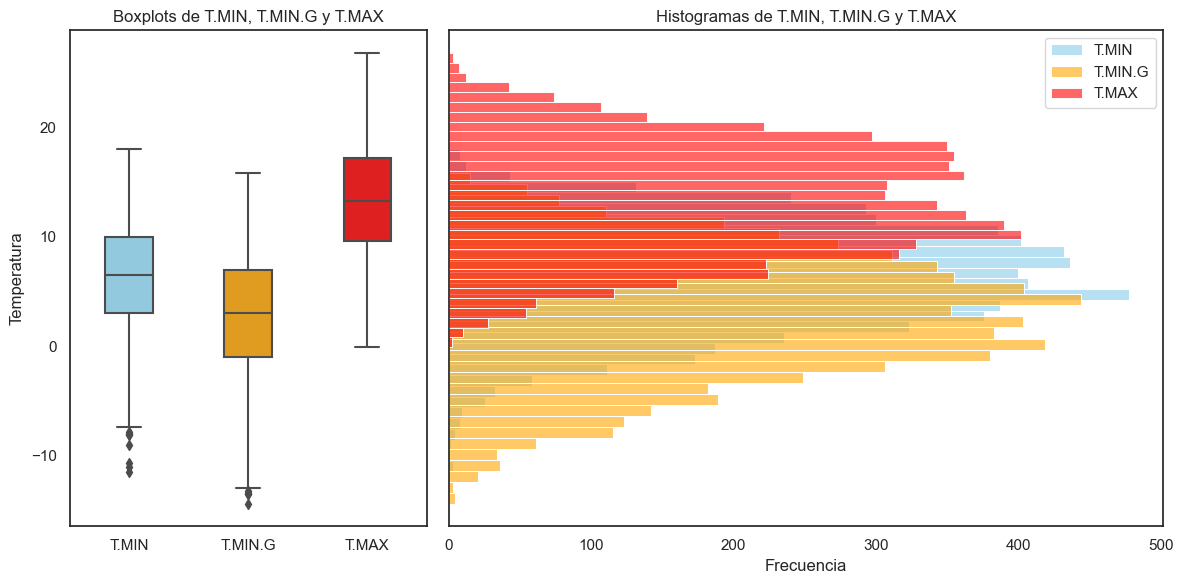

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MIN.G", "T.MAX"]
data = df[columnas_interes]

# Calcular estadísticas descriptivas
cuartil_25 = data.quantile(0.25)
cuartil_75 = data.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1

# Imprimir estadísticas descriptivas
print(data.describe())
print("\nRango intercuartil (IQR):")
print(rango_intercuartil)

# Convertir el dataframe al formato largo para evitar solapamiento
data_melted = data.melt(var_name="Variable", value_name="Valor")

# Crear la figura con subplots (boxplots a la izquierda, histogramas a la derecha)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Boxplots a la izquierda (más angostos)
sns.boxplot(x="Variable", y="Valor", data=data_melted, palette=["skyblue", "orange", "red"], ax=axes[0], width=0.4)
axes[0].set_title('Boxplots de T.MIN, T.MIN.G y T.MAX')
axes[0].set_xlabel('')
axes[0].set_ylabel('Temperatura')

# Histogramas a la derecha (con orientación horizontal)
sns.histplot(y=data["T.MIN"], bins=30, color='skyblue', alpha=0.6, ax=axes[1], label='T.MIN')
sns.histplot(y=data["T.MIN.G"], bins=30, color='orange', alpha=0.6, ax=axes[1], label='T.MIN.G')
sns.histplot(y=data["T.MAX"], bins=30, color='red', alpha=0.6, ax=axes[1], label='T.MAX')

# Ajustar leyendas y título
axes[1].set_title('Histogramas de T.MIN, T.MIN.G y T.MAX')
axes[1].set_xlabel('Frecuencia')
axes[1].legend()

plt.tight_layout()
plt.show()


### T MIN 

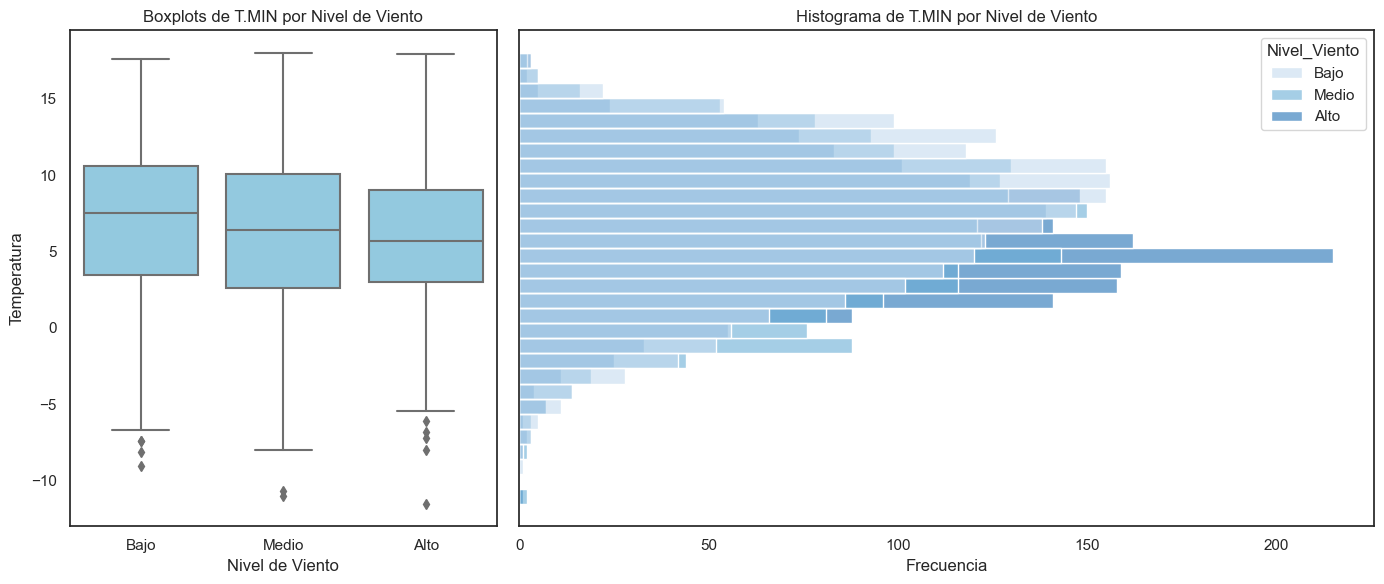

             T.MIN
count  5900.000000
mean      6.411678
std       4.637243
min     -11.500000
25%       3.000000
50%       6.500000
75%      10.000000
max      18.000000

Rango intercuartil (IQR):
T.MIN    7.0
dtype: float64


C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\601396617.py:44: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_25 = data.quantile(0.25)
C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\601396617.py:45: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_75 = data.quantile(0.75)


In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Definir los cuantiles para segmentar el viento en tres categorías
q1 = df["WIND"].quantile(0.33)
q2 = df["WIND"].quantile(0.66)

# Crear una nueva columna con los niveles de viento
df["Nivel_Viento"] = pd.cut(df["WIND"], bins=[df["WIND"].min(), q1, q2, df["WIND"].max()], 
                            labels=["Bajo", "Medio", "Alto"], include_lowest=True)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "Nivel_Viento"]
data = df[columnas_interes]

# Convertir al formato largo para Seaborn
data_melted = data.melt(id_vars="Nivel_Viento", var_name="Variable", value_name="Valor")

# Crear la figura con subplots (boxplots a la izquierda, histograma a la derecha)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Boxplot por nivel de viento
sns.boxplot(x="Nivel_Viento", y="Valor", data=data_melted, color="skyblue", ax=axes[0])
axes[0].set_title('Boxplots de T.MIN por Nivel de Viento')
axes[0].set_xlabel('Nivel de Viento')
axes[0].set_ylabel('Temperatura')

# Histograma de T.MIN con orientación horizontal
sns.histplot(y=data["T.MIN"], bins=30, hue=data["Nivel_Viento"], palette="Blues", alpha=0.6, ax=axes[1])
axes[1].set_title('Histograma de T.MIN por Nivel de Viento')
axes[1].set_xlabel('Frecuencia')

plt.tight_layout()
plt.show()

cuartil_25 = data.quantile(0.25)
cuartil_75 = data.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1

# Imprimir estadísticas descriptivas
print(data.describe())
print("\nRango intercuartil (IQR):")
print(rango_intercuartil)


### t MIN G

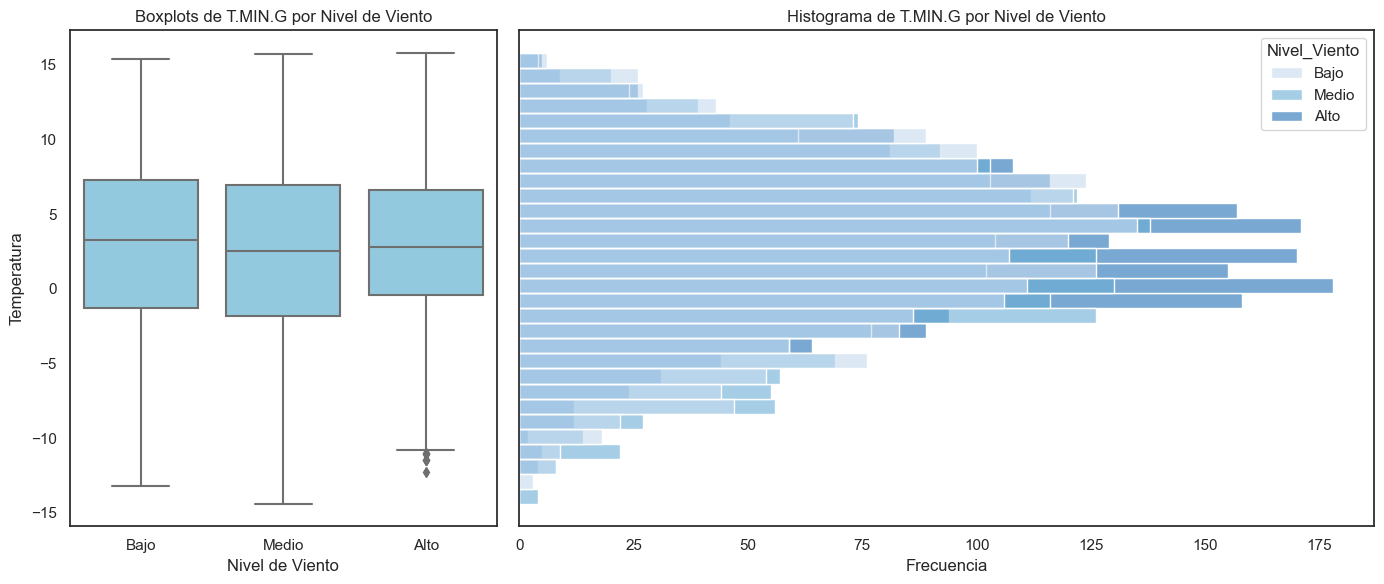

           T.MIN.G
count  6214.000000
mean      2.736547
std       5.569175
min     -14.400000
25%      -1.000000
50%       3.000000
75%       7.000000
max      15.800000

Rango intercuartil (IQR):
T.MIN.G    8.0
dtype: float64


C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\159927232.py:44: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_25 = data.quantile(0.25)
C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\159927232.py:45: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_75 = data.quantile(0.75)


In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Definir los cuantiles para segmentar el viento en tres categorías
q1 = df["WIND"].quantile(0.33)
q2 = df["WIND"].quantile(0.66)

# Crear una nueva columna con los niveles de viento
df["Nivel_Viento"] = pd.cut(df["WIND"], bins=[df["WIND"].min(), q1, q2, df["WIND"].max()], 
                            labels=["Bajo", "Medio", "Alto"], include_lowest=True)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN.G", "Nivel_Viento"]
data = df[columnas_interes]

# Convertir al formato largo para Seaborn
data_melted = data.melt(id_vars="Nivel_Viento", var_name="Variable", value_name="Valor")

# Crear la figura con subplots (boxplots a la izquierda, histograma a la derecha)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Boxplot por nivel de viento
sns.boxplot(x="Nivel_Viento", y="Valor", data=data_melted, color="skyblue", ax=axes[0])
axes[0].set_title('Boxplots de T.MIN.G por Nivel de Viento')
axes[0].set_xlabel('Nivel de Viento')
axes[0].set_ylabel('Temperatura')

# Histograma de T.MIN.G con orientación horizontal
sns.histplot(y=data["T.MIN.G"], bins=30, hue=data["Nivel_Viento"], palette="Blues", alpha=0.6, ax=axes[1])
axes[1].set_title('Histograma de T.MIN.G por Nivel de Viento')
axes[1].set_xlabel('Frecuencia')

plt.tight_layout()
plt.show()

cuartil_25 = data.quantile(0.25)
cuartil_75 = data.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1

# Imprimir estadísticas descriptivas
print(data.describe())
print("\nRango intercuartil (IQR):")
print(rango_intercuartil)


### T MAX

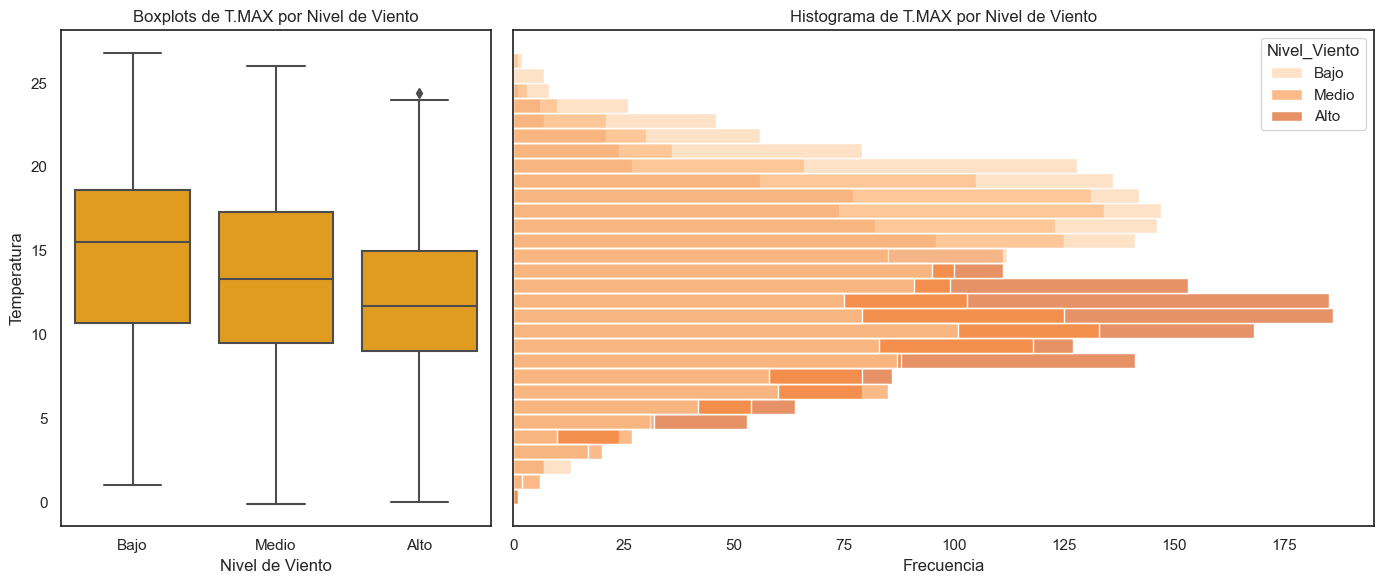

             T.MAX
count  5953.000000
mean     13.339123
std       4.890546
min      -0.100000
25%       9.600000
50%      13.300000
75%      17.200000
max      26.800000

Rango intercuartil (IQR):
T.MAX    7.6
dtype: float64


C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\1036998574.py:45: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_25 = data.quantile(0.25)
C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\1036998574.py:46: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_75 = data.quantile(0.75)


In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Definir los cuantiles para segmentar el viento en tres categorías
q1 = df["WIND"].quantile(0.33)
q2 = df["WIND"].quantile(0.66)

# Crear una nueva columna con los niveles de viento
df["Nivel_Viento"] = pd.cut(df["WIND"], bins=[df["WIND"].min(), q1, q2, df["WIND"].max()], 
                            labels=["Bajo", "Medio", "Alto"], include_lowest=True)

# Seleccionar las columnas de interés
columnas_interes = ["T.MAX", "Nivel_Viento"]
data = df[columnas_interes]

# Convertir al formato largo para Seaborn
data_melted = data.melt(id_vars="Nivel_Viento", var_name="Variable", value_name="Valor")

# Crear la figura con subplots (boxplots a la izquierda, histograma a la derecha)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Boxplot por nivel de viento
sns.boxplot(x="Nivel_Viento", y="Valor", data=data_melted, color="orange", ax=axes[0])
axes[0].set_title('Boxplots de T.MAX por Nivel de Viento')
axes[0].set_xlabel('Nivel de Viento')
axes[0].set_ylabel('Temperatura')

# Histograma de T.MAX con orientación horizontal
sns.histplot(y=data["T.MAX"], bins=30, hue=data["Nivel_Viento"], palette="Oranges", alpha=0.6, ax=axes[1])
axes[1].set_title('Histograma de T.MAX por Nivel de Viento')
axes[1].set_xlabel('Frecuencia')

plt.tight_layout()
plt.show()


cuartil_25 = data.quantile(0.25)
cuartil_75 = data.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1

# Imprimir estadísticas descriptivas
print(data.describe())
print("\nRango intercuartil (IQR):")
print(rango_intercuartil)

### VEL VIENTO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


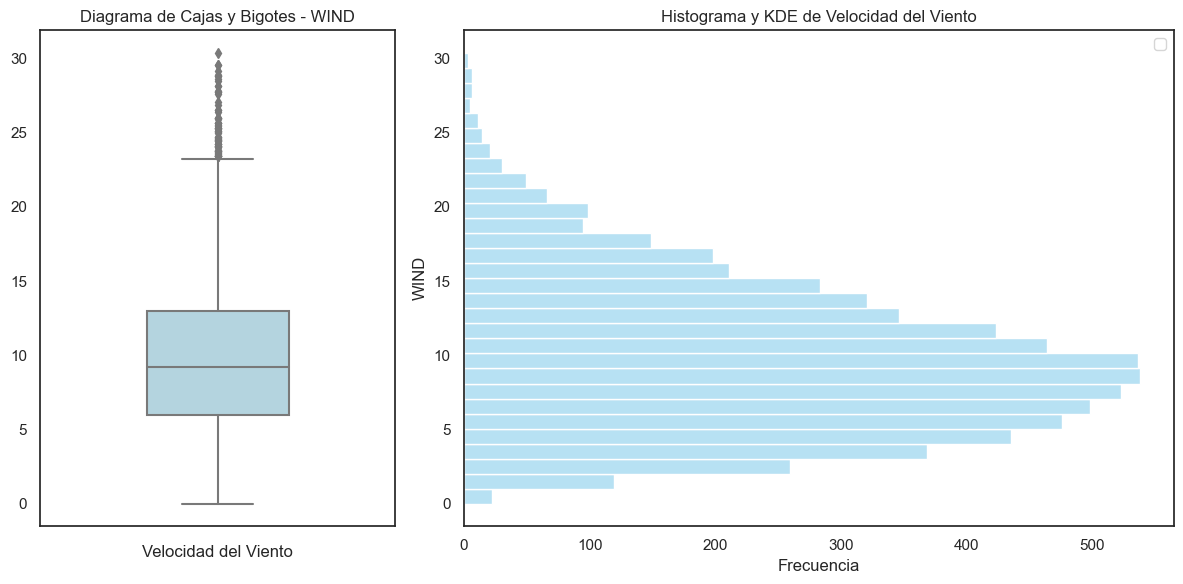

count    6574.000000
mean        9.796834
std         4.977272
min         0.000000
25%         6.000000
50%         9.210000
75%        12.960000
max        30.370000
Name: WIND, dtype: float64
Estadísticas descriptivas de la velocidad media del viento:
Rango intercuartil (IQR): 6.96


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar la columna de velocidad media del viento (WIND)
velocidad_viento = df["WIND"]

# Calcular estadísticas descriptivas
promedio = velocidad_viento.mean()
mediana = velocidad_viento.median()
cuartil_25 = velocidad_viento.quantile(0.25)
cuartil_75 = velocidad_viento.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1

# Crear la figura con subplots (boxplot a la izquierda, histogramas a la derecha)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Boxplot a la izquierda (más angosto y separado en dos categorías ficticias para evitar solapamiento)
sns.boxplot(y=velocidad_viento, width=0.4, color="lightblue", ax=axes[0])
axes[0].set_title('Diagrama de Cajas y Bigotes - WIND')
axes[0].set_xlabel('Velocidad del Viento')
axes[0].set_ylabel('')

# Histogramas a la derecha (con orientación vertical)
sns.histplot(y=velocidad_viento, bins=30, color='skyblue', alpha=0.6, ax=axes[1])

# Ajustar leyendas y título
axes[1].set_title('Histograma y KDE de Velocidad del Viento')
axes[1].set_xlabel('Frecuencia')
axes[1].legend()

# Eliminar cuadrículas de fondo
for ax in axes:
    ax.grid(False)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

cuartil_25 = velocidad_viento.quantile(0.25)
cuartil_75 = velocidad_viento.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1

# Opcional: Estadísticas descriptivas
print(velocidad_viento.describe())
print("Estadísticas descriptivas de la velocidad media del viento:")
print(f"Rango intercuartil (IQR): {rango_intercuartil:.2f}")


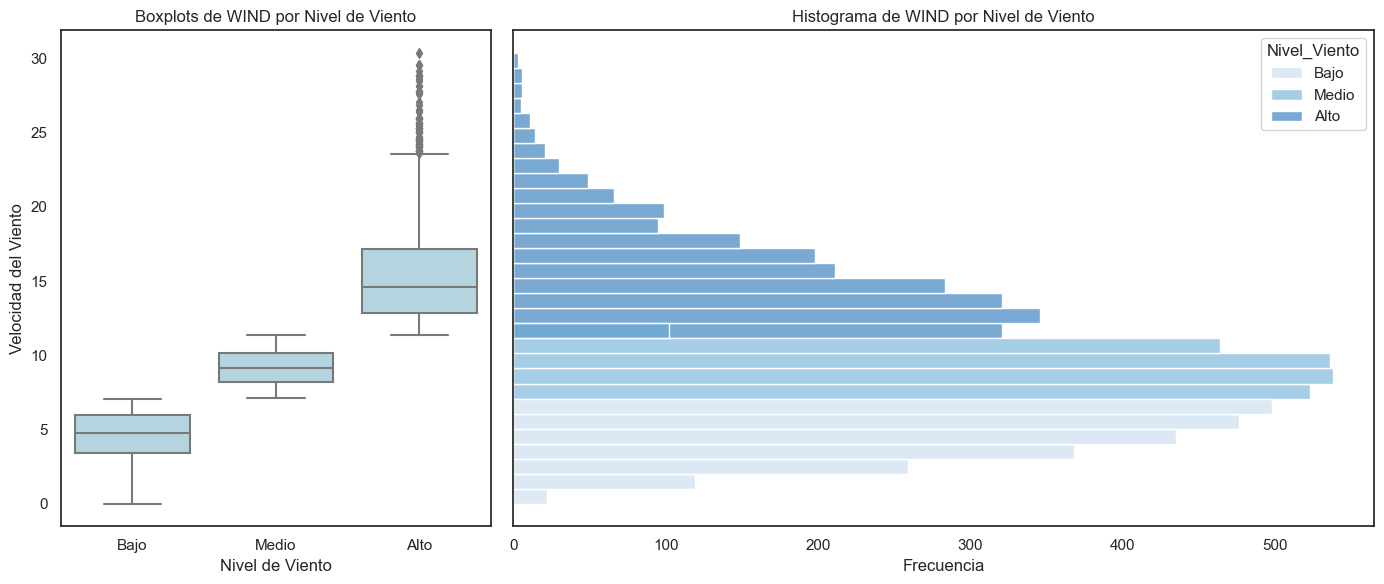

              WIND
count  6574.000000
mean      9.796834
std       4.977272
min       0.000000
25%       6.000000
50%       9.210000
75%      12.960000
max      30.370000

Rango intercuartil (IQR):
WIND    6.96
dtype: float64


C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\1821807067.py:44: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_25 = data.quantile(0.25)
C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_18164\1821807067.py:45: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cuartil_75 = data.quantile(0.75)


In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Definir los cuantiles para segmentar el viento en tres categorías
q1 = df["WIND"].quantile(0.33)
q2 = df["WIND"].quantile(0.66)

# Crear una nueva columna con los niveles de viento
df["Nivel_Viento"] = pd.cut(df["WIND"], bins=[df["WIND"].min(), q1, q2, df["WIND"].max()], 
                            labels=["Bajo", "Medio", "Alto"], include_lowest=True)

# Seleccionar la columna de interés
columnas_interes = ["WIND", "Nivel_Viento"]
data = df[columnas_interes]

# Convertir al formato largo para Seaborn
data_melted = data.melt(id_vars="Nivel_Viento", var_name="Variable", value_name="Valor")

# Crear la figura con subplots (boxplots a la izquierda, histograma a la derecha)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Boxplot de WIND por nivel de viento
sns.boxplot(x="Nivel_Viento", y="Valor", data=data_melted, color="lightblue", ax=axes[0])
axes[0].set_title('Boxplots de WIND por Nivel de Viento')
axes[0].set_xlabel('Nivel de Viento')
axes[0].set_ylabel('Velocidad del Viento')

# Histograma de WIND con orientación horizontal
sns.histplot(y=data["WIND"], bins=30, hue=data["Nivel_Viento"], palette="Blues", alpha=0.6, ax=axes[1])
axes[1].set_title('Histograma de WIND por Nivel de Viento')
axes[1].set_xlabel('Frecuencia')

plt.tight_layout()
plt.show()

cuartil_25 = data.quantile(0.25)
cuartil_75 = data.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1

# Imprimir estadísticas descriptivas
print(data.describe())
print("\nRango intercuartil (IQR):")
print(rango_intercuartil)


### coeficientes

         Skewness  Yule-Kendall Index
T.MAX   -0.007185            0.078947
T.MIN   -0.190316            0.014493
T.MIN.G -0.192213            0.000000
WIND     0.639317            0.083815


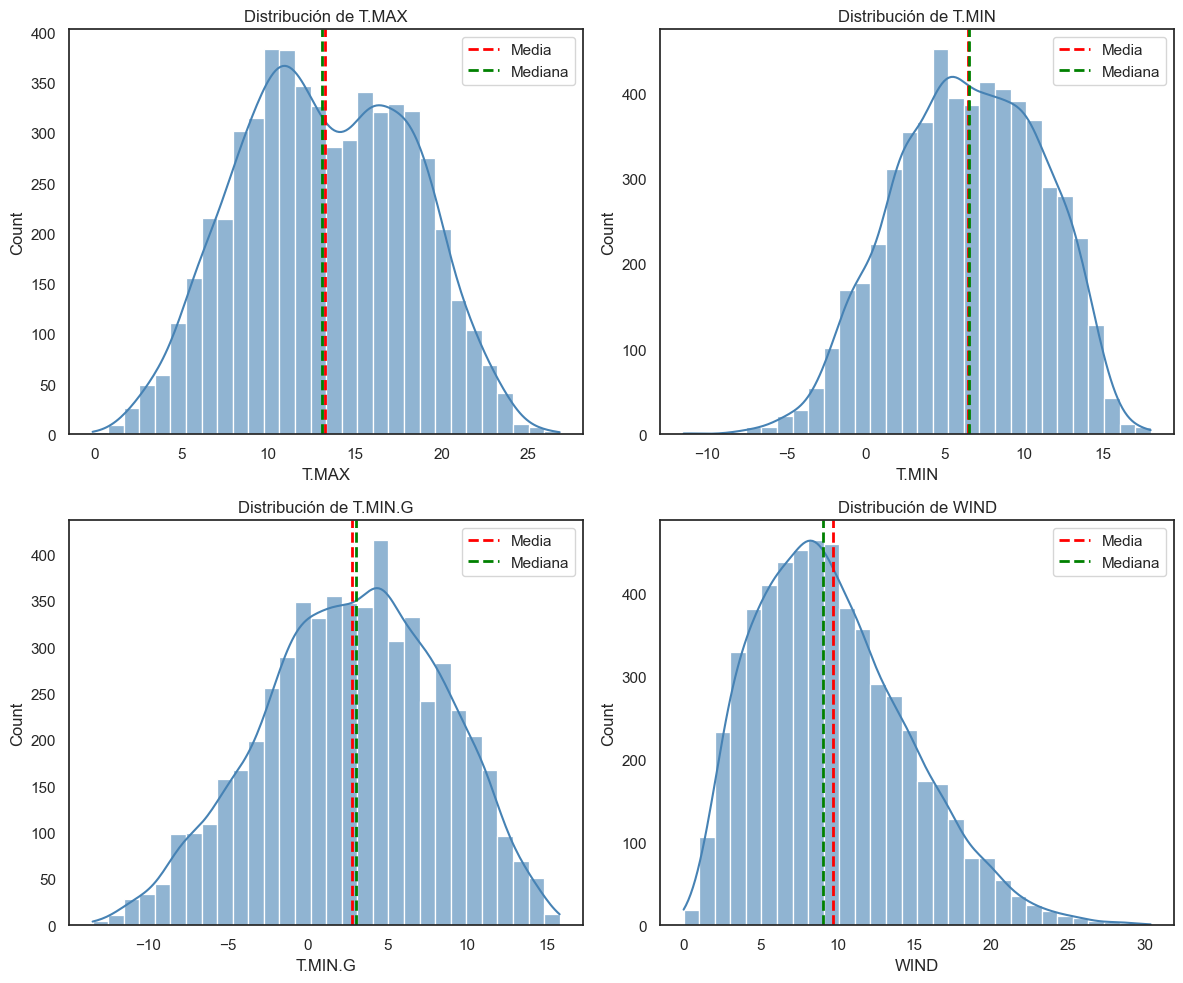

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MAX", "T.MIN", "T.MIN.G", "WIND"]
data = df[columnas_interes].dropna()  # Eliminar valores NaN

# Calcular Skewness (Asimetría de Fisher)
skewness_values = data.apply(skew, nan_policy='omit')

# Calcular el índice de Yule-Kendall
def yule_kendall(series):
    Q1 = series.quantile(0.25)
    Q2 = series.median()
    Q3 = series.quantile(0.75)
    return (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)

yk_values = data.apply(yule_kendall)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Skewness": skewness_values,
    "Yule-Kendall Index": yk_values
})

# Mostrar resultados
print(resultados)

# Visualización de la distribución de cada variable
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.set(style="white")

for i, col in enumerate(columnas_interes):
    ax = axes[i // 2, i % 2]
    sns.histplot(data[col], bins=30, kde=True, ax=ax, color="steelblue", alpha=0.6)
    ax.set_title(f'Distribución de {col}')
    ax.axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
    ax.axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')
    ax.legend()

plt.tight_layout()
plt.show()